<a href="https://colab.research.google.com/github/Aloxxa/r_public/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_A1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1w7aTq82g-kU_PQWtBoe4wLkRgAmT8wlW
!gdown --id 1kCmM8R6xokl4wZ3baSJizJW_6UikM7iD
!gdown --id 15P_eXXgV_UhqBAULHeF3nXWp3Sa5H81t

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1w7aTq82g-kU_PQWtBoe4wLkRgAmT8wlW
To: /content/Tariff_plans_change.csv
100% 513k/513k [00:00<00:00, 93.4MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kCmM8R6xokl4wZ3baSJizJW_6UikM7iD
To: /content/Charges.csv
100% 2.59M/2.59M [00:00<00:00, 143MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: htt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [3]:
datac = pd.read_csv('/content/Charges.csv')
datas = pd.read_csv('/content/Suspended.csv')
datat = pd.read_csv('/content/Tariff_plans_change.csv')

In [4]:
dfc = datac.copy()
dfs = datas.copy()
dft = datat.copy()

In [5]:
dfc.head()

,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03-01,4.572
1,1754,2017-05-01,4.894
2,381,2017-01-01,6.670
3,5832,2016-12-01,4.299
4,5277,2017-03-01,1.610


In [6]:
dfs.head()

,SUBSCRIBER_ID,START_DT,END_DT,STATUS
0,5195,2017-12-27,2017-12-27,Suspended
1,5198,2017-04-18,2017-04-18,Suspended
2,381,2017-04-18,2017-04-20,Suspended
3,3500,2017-12-21,$null$,Suspended
4,3302,2016-08-23,2016-09-07,Suspended


In [7]:
dft.head()

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17
1,1,3,2017-03-11 14:24:18,$null$
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58
3,2,5,2017-06-29 12:39:59,$null$
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59


# 1) Направления смен тарифных планов: с каких тарифных планов и на какие шли  наибольшие перетоки? Визуализировать потоки миграций на диаграмме.


In [8]:
t = dft.groupby(['TARIFF_PLAN_ID', 'SUBSCRIBER_ID']).size().unstack(fill_value=0)
t

SUBSCRIBER_ID,1,2,3,4,5,6,7,8,9,10,...,5980,5981,5982,5983,5984,5985,5986,5987,5988,5989
TARIFF_PLAN_ID,,,,,,,,,,,,,,,,,,,,,
1,0,1,1,0,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,0,...,0,1,1,1,1,0,0,1,0,0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
5,0,1,1,1,1,1,1,0,0,1,...,1,1,1,1,1,1,1,1,0,1


In [9]:
dft['next_tariff'] = dft.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].shift(-1)
dft = dft.dropna(subset=['next_tariff'])

In [10]:
transition_counts = dft.groupby(['TARIFF_PLAN_ID', 'next_tariff']).size().reset_index(name='count')
transition_counts.sort_values(by='count', ascending=False)

,TARIFF_PLAN_ID,next_tariff,count
13,3,5.0,2372
4,1,5.0,1613
18,4,5.0,528
8,2,5.0,417
3,1,4.0,378
12,3,4.0,367
7,2,4.0,158
19,5,1.0,81
21,5,3.0,75
16,4,3.0,56


In [11]:
transition_counts['transition'] = transition_counts['TARIFF_PLAN_ID'].astype(str) + ' => ' + transition_counts['next_tariff'].astype(str)

<ipython-input-12-81834d7efe45>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transition', y='count', data=transition_counts, palette='coolwarm')


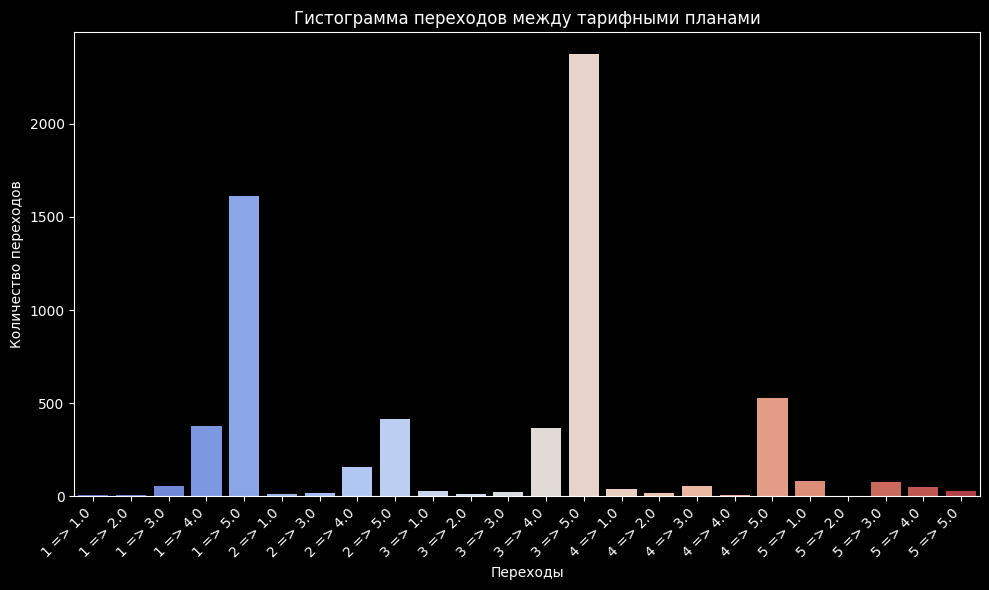

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='transition', y='count', data=transition_counts, palette='coolwarm')
plt.title('Гистограмма переходов между тарифными планами')
plt.xlabel('Переходы')
plt.ylabel('Количество переходов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2)	Насколько изменился среднемесячный счет абонентов за период 3 месяца после месяца смены тарифного плана в сравнении с периодом 3 месяца до месяца смены тарифного плана. Какие направления смен тарифных планов характеризовались ростом среднего счета в трехмесячном периоде, а какие – сокращением.  Визуализировать результаты на диаграммах.

In [13]:
dfc['BILL_MONTH'] = pd.to_datetime(dfc['BILL_MONTH'])
dfs['START_DT'] = pd.to_datetime(dfs['START_DT'])
dfs['END_DT'] = pd.to_datetime(dfs['END_DT'], errors='coerce')
dft['START_DTTM'] = pd.to_datetime(dft['START_DTTM'])
dft['END_DTTM'] = pd.to_datetime(dft['END_DTTM'],  errors='coerce')

In [14]:
dft

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,next_tariff
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,3.0
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58,5.0
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59,5.0
6,4,3,2016-01-27 23:03:51,2017-01-09 19:27:50,5.0
8,5,1,2016-02-06 08:07:15,2017-05-08 12:39:59,5.0
...,...,...,...,...,...
12334,5985,4,2017-04-14 14:01:33,2017-06-17 15:00:46,5.0
12336,5986,5,2017-05-01 11:28:36,2017-06-27 17:45:06,1.0
12338,5987,5,2017-05-08 17:27:21,2017-05-23 13:07:56,3.0
12340,5988,1,2017-05-10 10:36:53,2017-05-22 16:36:55,4.0


In [15]:
changes = []

for _, row in dft.dropna(subset=['next_tariff']).iterrows():
    subscriber_id = row['SUBSCRIBER_ID']
    old_tariff = row['TARIFF_PLAN_ID']
    new_tariff = row['next_tariff']
    change_date = row['START_DTTM']

    charges_before = dfc[(dfc['SUBSCRIBER_ID'] == subscriber_id) &
                             (dfc['BILL_MONTH'] < change_date) &
                             (dfc['BILL_MONTH'] >= change_date - pd.DateOffset(months=3))]

    charges_after = dfc[(dfc['SUBSCRIBER_ID'] == subscriber_id) &
                            (dfc['BILL_MONTH'] > change_date) &
                            (dfc['BILL_MONTH'] <= change_date + pd.DateOffset(months=3))]

    avg_before = charges_before['CHARGES'].mean()
    avg_after = charges_after['CHARGES'].mean()

    change = avg_after - avg_before
    changes.append({'old_tariff': old_tariff, 'new_tariff': new_tariff, 'change': change})

In [16]:
changes_df = pd.DataFrame(changes)
changes_df.sample(5)

,old_tariff,new_tariff,change
1061,3,5.0,NaN
1072,1,5.0,NaN
2778,1,4.0,4.443667
3422,2,4.0,NaN
1945,1,5.0,NaN


In [17]:
direction_changes = changes_df.groupby(['old_tariff', 'new_tariff']).agg({'change': 'mean'}).reset_index()

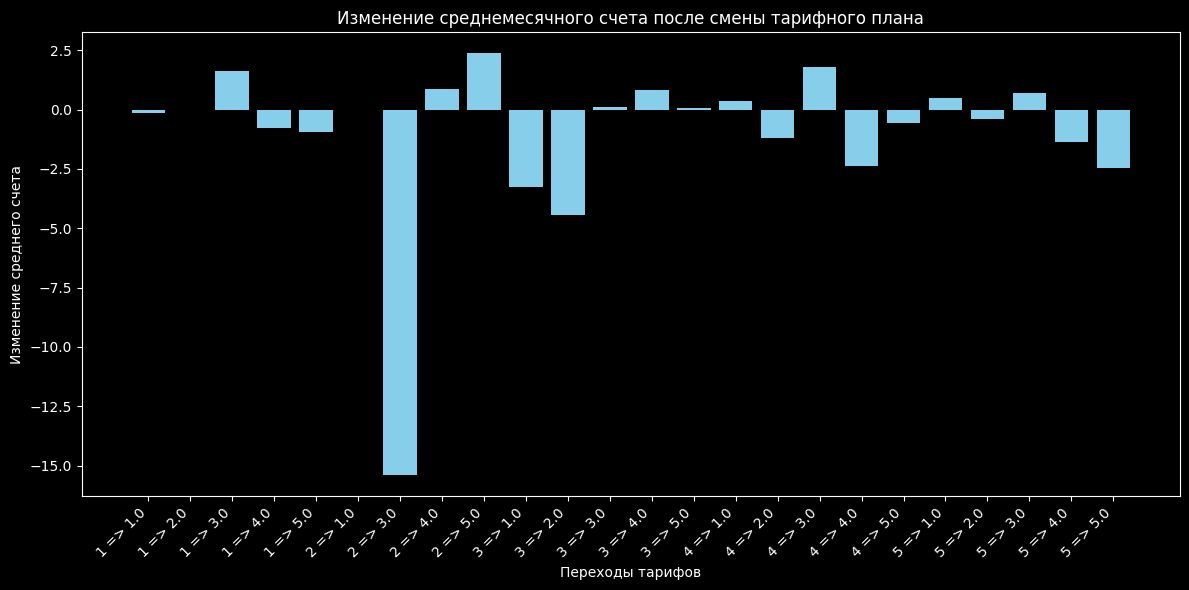

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(direction_changes['old_tariff'].astype(str) + ' => ' + direction_changes['new_tariff'].astype(str), direction_changes['change'], color='skyblue')
plt.title('Изменение среднемесячного счета после смены тарифного плана')
plt.xlabel('Переходы тарифов')
plt.ylabel('Изменение среднего счета')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3)	Аналогично п.2, только относительно изменения уровня блокировок: насколько реже или чаще стали попадать в блокировки абоненты после миграции в целом и для каждого направления миграции в отдельности. Для сравнения использовать те же периоды: 3 месяца до месяца смены плана и 3 месяца после месяца смены.

In [19]:
changes_block = []

for _, row in dft.dropna(subset=['next_tariff']).iterrows():
    subscriber_id = row['SUBSCRIBER_ID']
    old_tariff = row['TARIFF_PLAN_ID']
    new_tariff = row['next_tariff']
    change_date = row['START_DTTM']

    blocked_before = dfs[(dfs['SUBSCRIBER_ID'] == subscriber_id) &
                               (dfs['START_DT'] < change_date) &
                               (dfs['START_DT'] >= change_date - pd.DateOffset(months=3))]

    blocked_after = dfs[(dfs['SUBSCRIBER_ID'] == subscriber_id) &
                              (dfs['START_DT'] > change_date) &
                              (dfs['START_DT'] <= change_date + pd.DateOffset(months=3))]

    blocked_days_before = sum((blocked_before['END_DT'].fillna(change_date) - blocked_before['START_DT']).dt.days)
    blocked_days_after = sum((blocked_after['END_DT'].fillna(change_date + pd.DateOffset(months=3)) - blocked_after['START_DT']).dt.days)

    change_blocked = blocked_days_after - blocked_days_before
    changes_block.append({'old_tariff': old_tariff, 'new_tariff': new_tariff, 'change_blocked': change_blocked})

In [20]:
changes_block_df = pd.DataFrame(changes_block)
changes_block_df.sample(5)

,old_tariff,new_tariff,change_blocked
6003,4,5.0,12
2471,3,5.0,0
5108,3,5.0,0
6073,4,5.0,0
1690,1,5.0,0


In [21]:
direction_changes_block = changes_block_df.groupby(['old_tariff', 'new_tariff']).agg({'change_blocked': 'mean'}).reset_index()

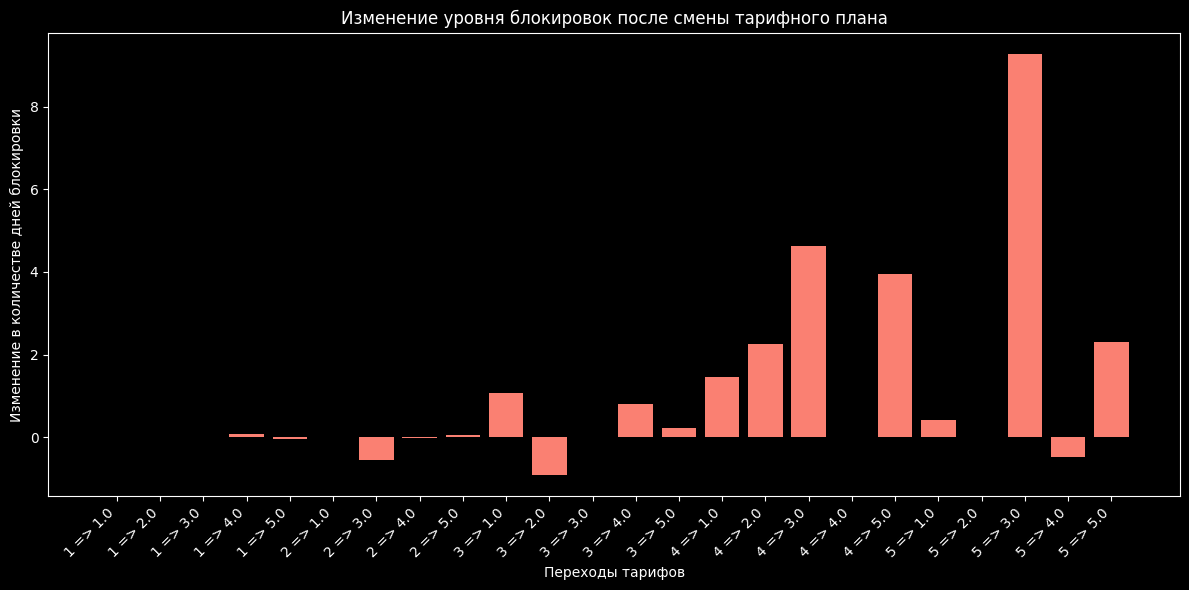

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(direction_changes_block['old_tariff'].astype(str) + ' => ' + direction_changes_block['new_tariff'].astype(str), direction_changes_block['change_blocked'], color='salmon')
plt.title('Изменение уровня блокировок после смены тарифного плана')
plt.xlabel('Переходы тарифов')
plt.ylabel('Изменение в количестве дней блокировки')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()